# Kelas Apa yang Harus Saya Ikuti?

Model Rekomendasi Kelas Daring

Dataset yang digunakan adalah dataset dari sistem pembelajaran [Office 365 MOOC](https://dileap.com/en/) yang diselenggarakan oleh Mandarine Academy, University of Lille. Data diterbitkan tahun 2022 dan disimpan pada repositori [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/BMY3UD).

Sitasi data:
Hafsa, M., Wattebled, P., Jacques, J., & Jourdan, L. (2023). E-learning recommender system dataset. Data in Brief, 47, 108942. https://doi.org/10.1016/j.dib.2023.108942

Sebagai catatan projek ini dikerjakan pada Google Colaboratory, semua *path* disesuaikan dengan spesifikasi pada Google Colaboratory.

![Picture](https://raw.githubusercontent.com/athayahisyam/MARS-Recommender/main/media/officemoocMandarine.jpg)

# *Library Import*

Ditambah sesuai kebutuhan

In [1]:
!pip install scikit-learn

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Akuisisi Data

In [76]:
items = pd.read_csv("/content/items_en_cleaned_2.csv")

## Isi `Items`

Tabel Items adalah tabel referensi data course video yang terdaftar pada sistem

In [77]:
# Melihat struktur dataframe
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     1165 non-null   int64  
 1   language    1165 non-null   object 
 2   name        1165 non-null   object 
 3   nb_views    1117 non-null   float64
 4   created_at  1165 non-null   int64  
 5   Difficulty  1165 non-null   object 
 6   Theme       1165 non-null   object 
 7   duration    1165 non-null   int64  
 8   type        1165 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 82.0+ KB


In [78]:
# Lima baris pertama pada item
items.head()

,item_id,language,name,nb_views,created_at,Difficulty,Theme,duration,type
0,510,en,What is OneDrive for Business?,1114.0,2016,Beginner,Collaboration,42,tutorial
1,511,en,"Add, restore, delete documents on OneDrive",547.0,2016,Beginner,Collaboration,122,tutorial
2,512,en,Share documents,607.0,2016,Beginner,Collaboration,176,tutorial
3,513,en,Recycle bin,278.0,2016,Beginner,Collaboration,46,tutorial
4,514,en,Sync OneDrive for Business to your computer (W...,312.0,2016,Beginner,Collaboration,163,tutorial


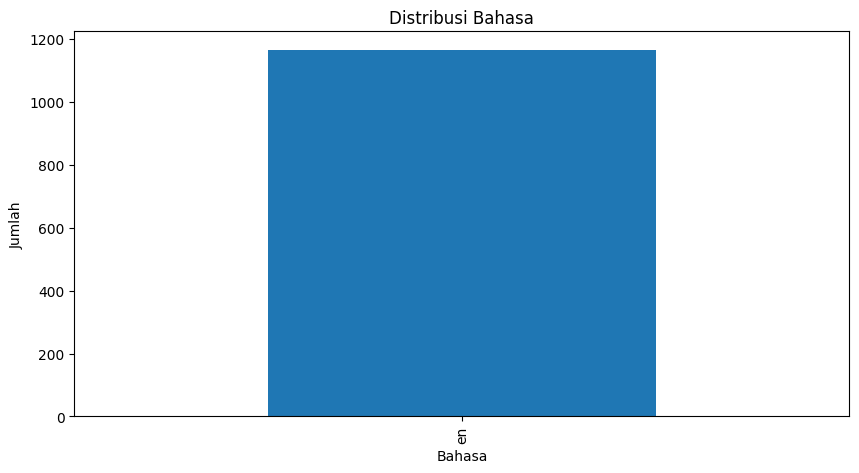

In [92]:
# Distribusi Bahasa
items['language'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Distribusi Bahasa')
plt.xlabel('Bahasa')
plt.ylabel('Jumlah')
plt.show()

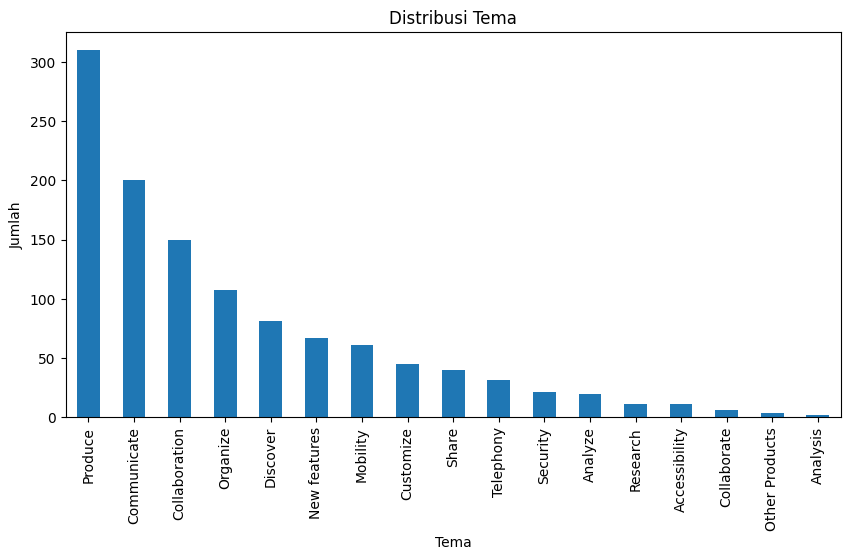

In [69]:
# Distribusi Tema
items['Theme'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Distribusi Tema')
plt.xlabel('Tema')
plt.ylabel('Jumlah')
plt.show()

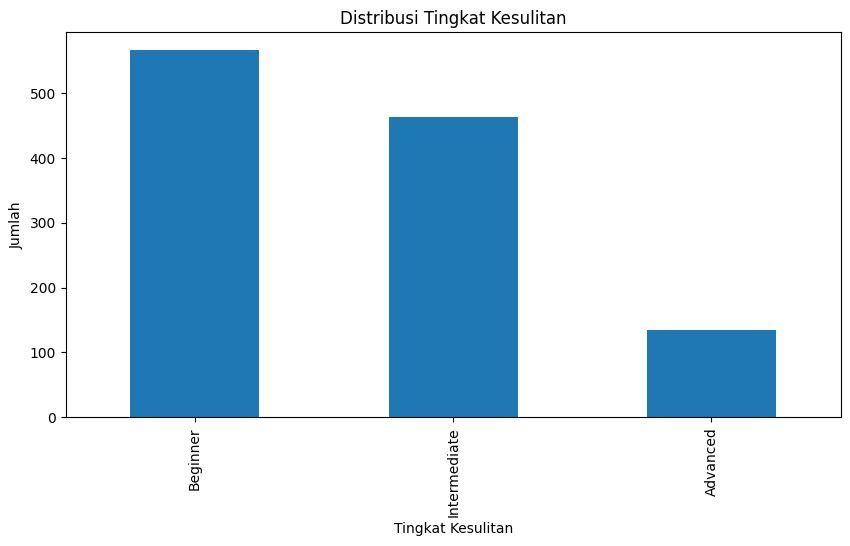

In [71]:
# Distribusi tingkat kesulitan
items['Difficulty'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Distribusi Tingkat Kesulitan')
plt.xlabel('Tingkat Kesulitan')
plt.ylabel('Jumlah')
plt.show()

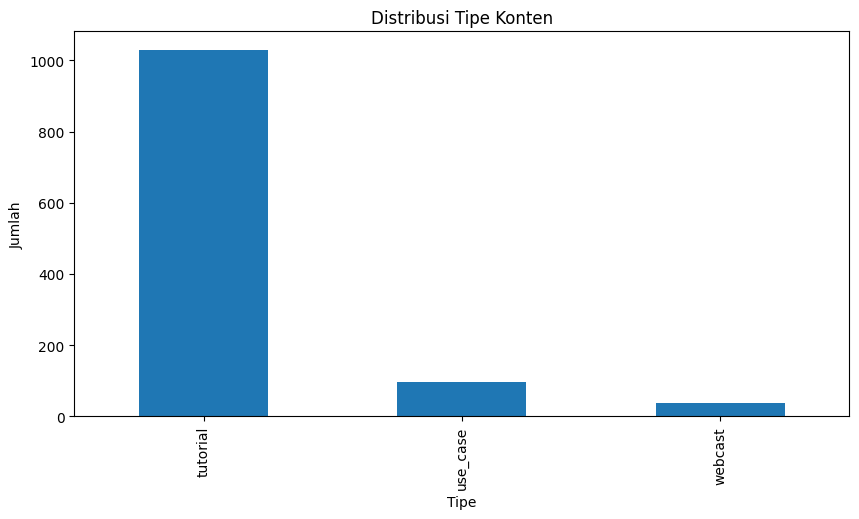

In [72]:
# Distribusi Tipe
items['type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Distribusi Tipe Konten')
plt.xlabel('Tipe')
plt.ylabel('Jumlah')
plt.show()

# *Data Preprocessing*

Pada `Items` ditemukan data kosong (*null values*). Pada tahap *preprocessing*, data kosong tersebut akan ditangani.

## Data Kosong pada `Items`

Pada `Items` data kosong terdapat pada `nb_views`. Karena `nb_views` akan digunakan pada *feature encoding*, `nb_views` akan diimputasi menggunakan *mean imputation*

In [79]:
# Imputasi rata-rata untuk nb_views
items['nb_views'] = items['nb_views'].fillna(items['nb_views'].mean())

In [80]:
# Cek nilai kosong
print(items.isnull().sum())

item_id       0
language      0
name          0
nb_views      0
created_at    0
Difficulty    0
Theme         0
duration      0
type          0
dtype: int64


# *Data Preparation*

## Feature Encoding

*Encoding* dibutuhkan untuk mengubah data kategori menjadi numerikal.

In [81]:
# One-hot encoding untuk dataframe item
items_encoded = pd.get_dummies(items, columns=['language', 'Difficulty', 'Theme', 'type'])

# Lima baris pertama data yang telah di encoding
items_encoded.head()

,item_id,name,nb_views,created_at,duration,language_en,Difficulty_Advanced,Difficulty_Beginner,Difficulty_Intermediate,Theme_Accessibility,...,Theme_Organize,Theme_Other Products,Theme_Produce,Theme_Research,Theme_Security,Theme_Share,Theme_Telephony,type_tutorial,type_use_case,type_webcast
0,510,What is OneDrive for Business?,1114.0,2016,42,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,511,"Add, restore, delete documents on OneDrive",547.0,2016,122,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,512,Share documents,607.0,2016,176,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,513,Recycle bin,278.0,2016,46,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,514,Sync OneDrive for Business to your computer (W...,312.0,2016,163,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [108]:
# Membuat variabel baru untuk menyimpan data yang digunakan untuk membuat cosine similarity
items_encoded_selected = items_encoded.drop(['item_id', 'name', 'created_at'], axis=1)

# Modelling

## Pengukuran Cosine Similarity

In [109]:
# Menghitung cosine similarity dari data numerik
cosine_sim_matrix = cosine_similarity(items_encoded_selected)

# Ubah menjadi dataframe
# item_id menjadi index.
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=items_encoded['item_id'], columns=items_encoded['item_id'])

In [111]:
cosine_sim_df.head()

item_id,510,511,512,513,514,515,516,526,527,528,...,422588,422589,422590,422591,422592,422593,422594,422595,422596,422597
item_id,,,,,,,,,,,,,,,,,,,,,
510,1.000000,0.983526,0.970251,0.992021,0.903142,0.957216,0.914181,0.968518,0.749756,0.828562,...,0.189606,0.173861,0.220695,0.160644,0.383143,0.298217,0.200241,0.200049,0.220009,0.240661
511,0.983526,1.000000,0.998031,0.998456,0.965875,0.993754,0.972381,0.997559,0.857017,0.916119,...,0.363960,0.349001,0.393351,0.336407,0.543750,0.465806,0.374033,0.373846,0.392697,0.412122
512,0.970251,0.998031,1.000000,0.993011,0.980218,0.998791,0.985101,0.999969,0.887649,0.939459,...,0.421663,0.407091,0.450237,0.394810,0.595294,0.520372,0.431461,0.431277,0.449597,0.468446
513,0.992021,0.998456,0.993011,1.000000,0.950035,0.986051,0.957954,0.992154,0.827140,0.892493,...,0.311787,0.296535,0.341811,0.283706,0.496453,0.416089,0.322075,0.321891,0.341152,0.361023
514,0.903142,0.965875,0.980218,0.950035,1.000000,0.988736,0.999636,0.981581,0.961229,0.988686,...,0.592770,0.579800,0.618032,0.568827,0.742483,0.679042,0.601455,0.601287,0.617460,0.634005


In [107]:
items_encoded_selected.head()

,nb_views,duration,language_en,Difficulty_Advanced,Difficulty_Beginner,Difficulty_Intermediate,Theme_Accessibility,Theme_Analysis,Theme_Analyze,Theme_Collaborate,...,Theme_Organize,Theme_Other Products,Theme_Produce,Theme_Research,Theme_Security,Theme_Share,Theme_Telephony,type_tutorial,type_use_case,type_webcast
0,1114.0,42,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,547.0,122,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,607.0,176,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,278.0,46,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,312.0,163,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Fungsi Rekomendasi

In [95]:
def get_similar_items(item_id, num_items):
    # Ambil data yang sesuai dengan item_id
    item_similarities = cosine_sim_df.loc[item_id]

    # Urutkan berdasarkan kemiripan
    similar_items = item_similarities.sort_values(ascending=False)

    # Menghapus item input dan menyisakan item yang direkomendasikan
    similar_items = similar_items.drop(item_id)

    # Ambil n peringkat teratas
    top_similar_items = similar_items.head(num_items)

    # Peroleh data detail item rekomendasi dan item input
    input_item_details = items[items['item_id'] == item_id][['item_id', 'name', 'Theme']]
    similar_item_details = items[items['item_id'].isin(top_similar_items.index)][['item_id', 'name', 'Theme']]

    return input_item_details, similar_item_details

## Output Rekomendasi

In [102]:
# masukkan ID disini, lihat pada tabel Items untuk mengecek adanya item_id
input_item, similar_items = get_similar_items(825, 10)

In [103]:
print(f"ID Konten = {input_item['item_id'].values[0]}\n")
input_item

ID Konten = 825



,item_id,name,Theme
138,825,Insert items in a presentation,Produce


In [104]:
print("\nKonten yang Mirip:\n")
similar_items


Konten yang Mirip:



,item_id,name,Theme
54,741,The SUM function,Produce
65,752,Customize charts,Produce
69,756,Three ways to add numbers in Excel Online,Produce
97,784,Manage conditional formatting,Produce
144,831,Print Notes Pages as handouts,Produce
183,870,Create custom animations with motion paths,Produce
269,4410,Introduction,Discover
378,12671,Insert and customize a footnote,Produce
402,12695,Start working together in a document,Produce
751,65432,Functions and formulas,Produce
